In [2]:
import nltk

In [3]:
import pandas as pd
spam_mails = pd.read_csv('/Users/sahitisomalraju/Downloads/spam_ham_dataset 2.csv')
spam_mails

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


# 1. Preprocessing

### Get the shape of the dataset 

In [4]:
spam_mails.shape

(5171, 4)

### Using one of the built-in functions for one of the libraries that you have learned during this course, define how many emails are spam (label_num=1) and how many emails are not spam (label_num=0).

In [5]:
spam = (spam_mails['label_num']==1)
spam_sum = spam.sum()
print(spam_sum)

non_spam = (spam_mails['label_num']==0)
non_spam_sum = non_spam.sum()
print(non_spam_sum)

1499
3672


### Plot a bar graph that shows the counts of spam and non-spam emails. 

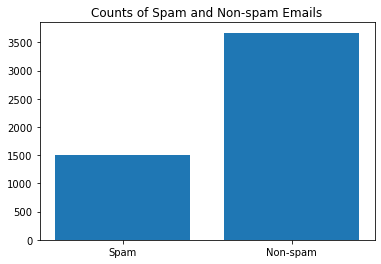

In [6]:
import matplotlib.pyplot as plt
x = ['Spam', 'Non-spam']
y = [spam_sum, non_spam_sum]
plt.bar(x, y)

plt.title('Counts of Spam and Non-spam Emails')
plt.show()

### Tokenize the email subject text of the 140th sample of the dataset once into words. How many words have you got after tokenization? 

In [7]:
email_subject_text1 = spam_mails.loc[140, 'text']
email_subject_text1

"Subject: fw : fw : equistar 1373 for march\r\ndaren - i won ' t be here on friday but tom acton will back me up .\r\nmegan parker keeps asking me for an answer - have you had a chance to decide what to do ?\r\nthanks - julie\r\n- - - - - original message - - - - -\r\nfrom : parker , megan\r\nsent : thursday , april 26 , 2001 8 : 34 am\r\nto : kemp , juliann\r\nsubject : re : fw : equistar 1373 for march\r\nhave you heard from daren yet ? equistar won ' t pay the invoice until we bill it correctly . thanks for you help . i know it ' s bid week .\r\nmegan\r\nfrom : juliann kemp / enron @ enronxgate on 04 / 25 / 2001 10 : 22 am\r\nto : megan parker / corp / enron @ enron\r\ncc :\r\nsubject : fw : equistar 1373 for march\r\ni sent this to daren farmer - to give me direction for the missing gas volumes .\r\nthe deals went to ' 0 ' in sitara by the trader and amiee confirmed it for the following days . thanks - julie\r\n- - - - - original message - - - - -\r\nfrom : kemp , juliann\r\nsent :

In [8]:
from nltk.tokenize import word_tokenize
text_tokenized = word_tokenize(email_subject_text1)
len(text_tokenized)

325

### Clean the email subject text of the 1265th sample of the dataset by removing stopwords. How many stopwords are in that text? Also, how many words are in the filtered/clean text?

In [9]:
email_subject_text2 = spam_mails.loc[1265, 'text']
email_subject_text2

'Subject: re : shell meters for october\r\nshell has made the following adjustment : 1581 = 10 m ; 1095 = 45 . net volume\r\nis still 90 m'

In [10]:
words2 = word_tokenize(email_subject_text2)
len(words2)

30

In [11]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

filtered_words2=[]
for word in words2:
    if word.casefold() not in stop_words:
        filtered_words2.append(word)

print('Number of stopwords in text:', len(words2)-len(filtered_words2))
print('Number of words in filtered text:', len(filtered_words2))

Number of stopwords in text: 7
Number of words in filtered text: 23


### Reduce the words of the email subject text of the 1835th sample of the dataset to its word root by performing stemming and to its meaningful base by performing lemmatization. Next check if stemming and lemmatization outputs are equal. 

In [12]:
email_subject_text3 = spam_mails.loc[1835, 'text']
email_subject_text3

'Subject: cp & l\r\nthanks for your help .\r\nrebecca\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by rebecca griffin / na / enron on 03 / 30 / 2001 04 : 11 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\njanet h wallis @ ect\r\n03 / 29 / 2001 08 : 49 am\r\nto : rebecca griffin / na / enron @ enron\r\ncc :\r\nsubject : cp & l\r\nplease add a spot sale for feb 21 at $ 5 . 16 for 5 k .\r\nthanks janet'

In [13]:
words3 = word_tokenize(email_subject_text3)
len(words3)

128

In [14]:
filtered_words3=[]
for word in words3:
    if word.casefold() not in stop_words:
        filtered_words3.append(word)

print(len(filtered_words3))

118


In [15]:
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stemmed_words = [stemmer.stem(word) for word in filtered_words3]
print(stemmed_words)

['subject', ':', 'cp', '&', 'l', 'thank', 'help', '.', 'rebecca', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'forward', 'rebecca', 'griffin', '/', 'na', '/', 'enron', '03', '/', '30', '/', '2001', '04', ':', '11', 'pm', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'janet', 'h', 'walli', '@', 'ect', '03', '/', '29', '/', '2001', '08', ':', '49', ':', 'rebecca', 'griffin', '/', 'na', '/', 'enron', '@', 'enron', 'cc', ':', 'subject', ':', 'cp', '&', 'l', 'pleas', 'add', 'spot', 'sale', 'feb', '21', '$', '5', '.', '16', '5', 'k', '.', 'thank', 'janet']


In [16]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatize_words = [lemmatizer.lemmatize(word) for word in filtered_words3]
print(lemmatize_words)

['Subject', ':', 'cp', '&', 'l', 'thanks', 'help', '.', 'rebecca', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'forwarded', 'rebecca', 'griffin', '/', 'na', '/', 'enron', '03', '/', '30', '/', '2001', '04', ':', '11', 'pm', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'janet', 'h', 'wallis', '@', 'ect', '03', '/', '29', '/', '2001', '08', ':', '49', ':', 'rebecca', 'griffin', '/', 'na', '/', 'enron', '@', 'enron', 'cc', ':', 'subject', ':', 'cp', '&', 'l', 'please', 'add', 'spot', 'sale', 'feb', '21', '$', '5', '.', '16', '5', 'k', '.', 'thanks', 'janet']


In [17]:
# Check if stemming and lemmatization outputs are equal.
if stemmed_words == lemmatize_words:
    print('Outputs are equal')
else:
    print('Outputs are not equal')
    difference = list(set(stemmed_words) - set(lemmatize_words))
    print('Words that are different:', difference)

Outputs are not equal
Words that are different: ['pleas', 'walli', 'thank', 'forward']


### Make a part of speech (POS) tagging to words of the email subject text of the 5011th sample of the dataset and print the POS tag of each word and its description by querying about it. 

In [18]:
email_subject_text4 = spam_mails.loc[5011, 'text']
email_subject_text4

'Subject: copanos changes\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by ami chokshi / corp / enron on 06 / 06 / 2000\r\n02 : 06 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\ntroy _ a _ benoit @ reliantenergy . com on 06 / 06 / 2000 10 : 35 : 09 am\r\nto : " ami chokshi "\r\ncc :\r\nsubject : copanos changes\r\n( see attached file : hpl - june . xls )\r\n- hpl - june . xls'

In [19]:
words4 = word_tokenize(email_subject_text4)
len(words4)

121

In [20]:
filtered_words4=[]
for word in words4:
    if word.casefold() not in stop_words:
        filtered_words4.append(word)

print(len(filtered_words4))

115


In [21]:
lemmatize_words = [lemmatizer.lemmatize(word) for word in filtered_words4]

In [22]:
nltk.pos_tag(lemmatize_words)

[('Subject', 'JJ'),
 (':', ':'),
 ('copanos', 'NN'),
 ('change', 'NN'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('forwarded', 'VBD'),
 ('ami', 'JJ'),
 ('chokshi', 'NN'),
 ('/', 'NNP'),
 ('corp', 'NN'),
 ('/', 'NNP'),
 ('enron', 'VBZ'),
 ('06', 'CD'),
 ('/', 'NN'),
 ('06', 'CD'),
 ('/', 'NN'),
 ('2000', 'CD'),
 ('02', 'CD'),
 (':', ':'),
 ('06', 'CD'),
 ('pm', 'NN'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('-', ':'),
 ('troy', 'NN'),
 ('_', 'JJ'),
 (

# 2. Feature Generation

### Generate features from email subject texts in your dataset once using the bag of words approach and another time using the TF-IDF approach. 

In [23]:
text = spam_mails['text']

In [24]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer

def feature_bow(text):
    # converts a collection of text documents to a matrix of token counts
    cv = CountVectorizer()
    
    # transforms text to numbers to count how many times each word existed in given dataset
    features = cv.fit_transform(text)
    return features
features_bag_words = feature_bow(text)
features_bag_words.shape

(5171, 50447)

In [25]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

def feature_tfidf(text):
    tf = TfidfVectorizer()
    features = tf.fit_transform(text)
    return features
features_tfidf = feature_tfidf(text)
features_tfidf.shape

(5171, 50447)

# 3. Text Classification

### Develop a random forest classifier / SVM classifier that can be trained using the features that you have generated using the bag of words approach and fit on 80 % of this dataset for training and predict the class of email either spam or not on the remaining 20 % of this dataset.  

In [26]:
target = spam_mails['label_num']

In [27]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features_bag_words, target, test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4136, 50447)
(4136,)
(1035, 50447)
(1035,)


In [28]:
from sklearn import svm
clf = svm.SVC()
model = clf.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

### Test your classifier's performance by reporting its accuracy, precision, recall, and F1 score. 

In [29]:
from sklearn import metrics
acc = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy Score:', acc)

prec = metrics.precision_score(Y_test, Y_pred)
print('Precision Score:', prec)

recall = metrics.recall_score(Y_test, Y_pred)
print('Recall Score:', recall)

f1 = metrics.f1_score(Y_test, Y_pred)
print('F1 Score:', f1)

Accuracy Score: 0.9671497584541063
Precision Score: 0.9308176100628931
Recall Score: 0.961038961038961
F1 Score: 0.9456869009584665


### Again, develop a random forest classifier that can be trained using the features that you have generated using the TF-IDF approach and fit on 80 % of this dataset for training and predict the class of email either spam or not on the remaining 20 % of this dataset. 

In [30]:
from sklearn.ensemble import RandomForestClassifier as rf
clf = rf()
model = clf.fit(X_train, Y_train)
Y_pred2 = model.predict(X_test)

### Test your classifier's performance by reporting its accuracy/ precision/ recall/ F1 score. 

In [31]:
acc = metrics.accuracy_score(Y_test, Y_pred2)
print('Accuracy Score:', acc)

prec = metrics.precision_score(Y_test, Y_pred2)
print('Precision Score:', prec)

recall = metrics.recall_score(Y_test, Y_pred2)
print('Recall Score:', recall)

f1 = metrics.f1_score(Y_test, Y_pred2)
print('F1 Score:', f1)

Accuracy Score: 0.9758454106280193
Precision Score: 0.9796610169491525
Recall Score: 0.9383116883116883
F1 Score: 0.9585406301824212


### Compare the performance results of your classifier when trained with the features generated by the bag of words approach and when trained with the features generated by the TF-IDF approach. 

It looks like the Support Vector Machine trained with features generated by the bag of words approach is comparable to the random forest classifier trained with features generated by the TF-IDF approach.

The accuracy and f1 scores are almost the same between the two models with the random forest classifier being slightly higher. For the precision score, the random forest classifier had a much higher result (almost 5% higher). For the recall score, on the other hand, the support vector machine had a better result (about 3% higher).